## Vizualização dos dados das ações da Empresa Magazine Luiza (MGLU3)

In [47]:
import pandas as pd 
from pandas_datareader import data as web 
import matplotlib
from datetime import datetime, timedelta

In [62]:
df = web.DataReader(f'MGLU3.SA', data_source = 'yahoo', start = f'02-20-2020', end = '02-20-2022')

In [63]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-20,14.5325,13.9575,14.4825,14.1350,44558000.0,13.787983
2020-02-21,14.4550,13.8500,13.9125,14.1125,38342000.0,13.766036
2020-02-26,13.5125,12.9400,13.2650,13.2200,53716400.0,12.895447
2020-02-27,13.3500,12.5050,13.0000,12.5625,58818800.0,12.254088
2020-02-28,12.6300,11.8050,12.2500,12.6300,78799200.0,12.319931
...,...,...,...,...,...,...
2022-02-14,6.6200,6.3200,6.3500,6.4800,117301900.0,6.480000
2022-02-15,6.8400,6.6100,6.6100,6.8400,94930300.0,6.840000
2022-02-16,6.9800,6.7200,6.8300,6.8200,100338500.0,6.820000


In [64]:
## Este gráfico apresenta as informações dos valores máximos e mínimos de cada dia de todo o período 

<AxesSubplot:title={'center':'Ações MGLU3.SA'}, xlabel='Date'>

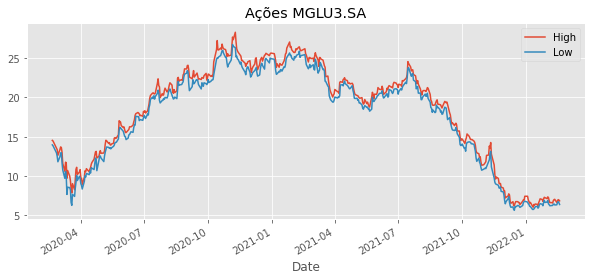

In [67]:
df[['High', 'Low']].plot(figsize=(10, 4), title='Ações MGLU3.SA', grid=True)

In [ ]:
# A média Móvel e o retorno diário são métricas comumentes analisadas em ações. 

In [69]:
# Média movel de 14 dias do Fechamento
df['MovingMean14'] = df.Close.rolling(14).mean()
# Média movel de 30 dias do Fechamento
df['MovingMean30'] = df.Close.rolling(30).mean()
# Retorno diário percentual
df['DailyReturn'] = df.Close.pct_change()
df.tail()

,High,Low,Open,Close,Volume,Adj Close,MovingMean14,MovingMean30,DailyReturn
Date,,,,,,,,,
2022-02-14,6.62,6.32,6.35,6.48,117301900.0,6.48,6.662857,6.470000,0.020472
2022-02-15,6.84,6.61,6.61,6.84,94930300.0,6.84,6.669286,6.477667,0.055556
2022-02-16,6.98,6.72,6.83,6.82,100338500.0,6.82,6.640714,6.491000,-0.002924
2022-02-17,6.93,6.59,6.81,6.63,97374700.0,6.63,6.635000,6.503667,-0.027859
2022-02-18,6.82,6.36,6.72,6.36,121026600.0,6.36,6.589286,6.508333,-0.040724


In [70]:
## Esse gráfico análisa os retornos diários das ações no decorrer do ano. 

<AxesSubplot:xlabel='Date'>

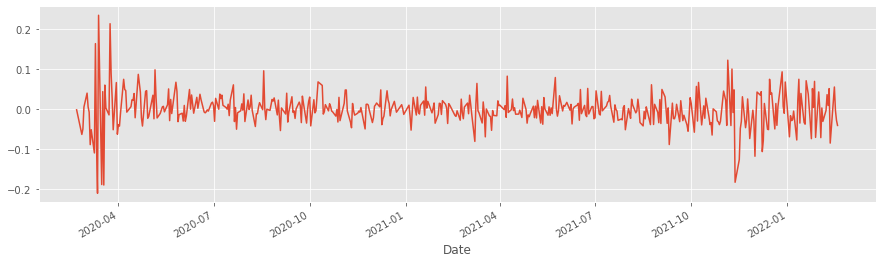

In [71]:
df.DailyReturn.plot(figsize=(15, 4), grid=True)

In [72]:
import matplotlib.dates as mdates

df.reset_index(inplace=True)
df['DateAsNumber'] = df.Date.apply(mdates.date2num)

In [73]:
# Criação do gráfico do tipo candlestick

In [74]:
from mpl_finance import candlestick_ohlc

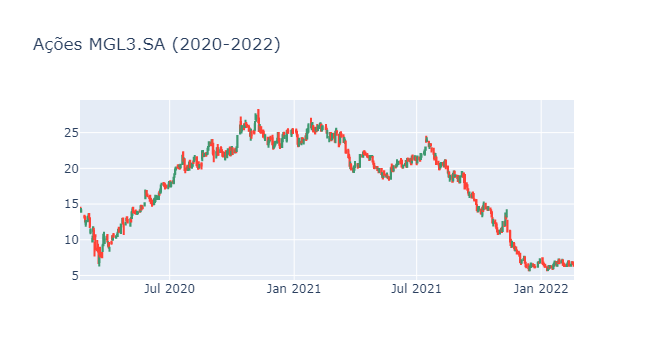

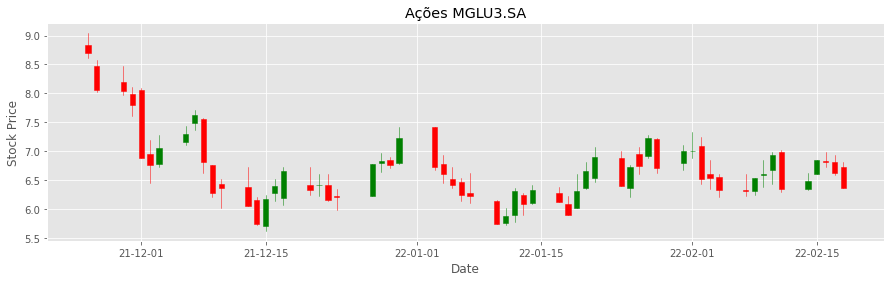

In [79]:
fig = go.Figure(data = [go.Candlestick(x=df['Date'], 
                                      open = df['Open'], high = df['High'], 
                                      low = df['Low'], close = df['Close'])])
fig.update_layout(xaxis_rangeslider_visible = False, 
                  title = 'Ações MGL3.SA (2020-2022)')
fig.show()



def plot_candle_stick(df):
    fig, ax1 = plt.subplots(1, 1, figsize=(15, 4))
    candlestick_ohlc(ax1, df.values, width=.6, colorup='g', colordown='r')
    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price')
    ax1.title.set_text('Ações MGLU3.SA')

columns = ['DateAsNumber', 'Open', 'High', 'Low', 'Close', 'Volume']
plot_candle_stick(df[columns].tail(60))


In [ ]:
# Gráfico candlestick com o Plotly 

In [53]:
# Gráfico candlestick com o Plotly 

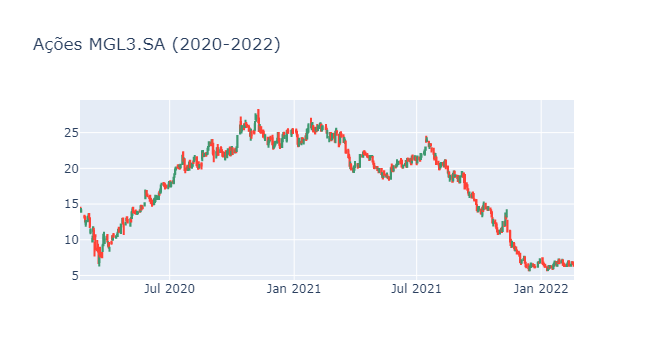

In [61]:
fig = go.Figure(data = [go.Candlestick(x=df['Date'], 
                                      open = df['Open'], high = df['High'], 
                                      low = df['Low'], close = df['Close'])])
fig.update_layout(xaxis_rangeslider_visible = False, 
                  title = 'Ações MGL3.SA (2020-2022)')
fig.show()